In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
%pip install scikit-plot
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

In [2]:
table = pd.read_csv('./drive/MyDrive/Colab Notebooks/creditcard.csv')

In [3]:
table.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
table[table.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [5]:
df=table.drop_duplicates(keep='first')
df.iloc[30:36]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30,24.0,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0
31,25.0,1.114009,0.085546,0.493702,1.335760,-0.300189,-0.010754,-0.118760,0.188617,0.205687,...,-0.053234,-0.004760,-0.031470,0.198054,0.565007,-0.337718,0.029057,0.004453,4.45,0
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
36,27.0,-0.246046,0.473267,1.695738,0.262411,-0.010866,-0.610836,0.793937,-0.247253,0.138879,...,-0.194600,-0.335133,-0.078180,0.392784,-0.031157,0.198037,-0.175347,-0.203616,30.49,0
37,27.0,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,...,0.082280,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0


In [6]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

## **Cost-sensetive**




---



# **XGBoost**

---




In [7]:
y = df['Class']
X = df.drop(['Class'], axis=1)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
weight = df['Class'].value_counts()[0]//df['Class'].value_counts()[1]
weight

598

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', missimg=None, seed=42, scale_pos_weight = weight,eval_metric='auc')
clf_xgb.fit(X_train,y_train, verbose = True, early_stopping_rounds=10, eval_set=[(X_test,y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.95322
[1]	validation_0-auc:0.95918
[2]	validation_0-auc:0.95762
[3]	validation_0-auc:0.97979
[4]	validation_0-auc:0.98127
[5]	validation_0-auc:0.98119
[6]	validation_0-auc:0.98146
[7]	validation_0-auc:0.98296
[8]	validation_0-auc:0.98342
[9]	validation_0-auc:0.98280
[10]	validation_0-auc:0.98207
[11]	validation_0-auc:0.98055
[12]	validation_0-auc:0.97722
[13]	validation_0-auc:0.97678
[14]	validation_0-auc:0.97614
[15]	validation_0-auc:0.97894
[16]	validation_0-auc:0.97831
[17]	validation_0-auc:0.97679
[18]	validation_0-auc:0.97816


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missimg=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

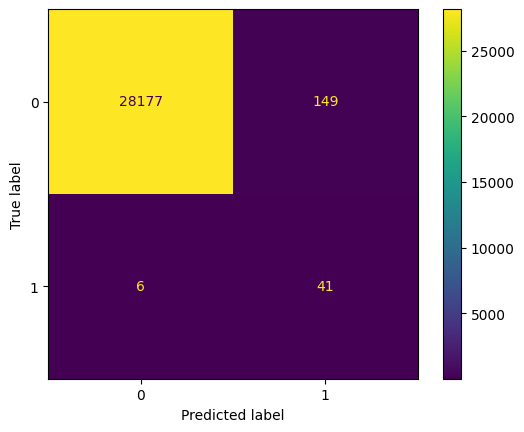

In [ ]:

ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test)

plt.show()

In [ ]:

param_grids = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0.01,0.05, 0.1],
    'gamma' : [0, 0.25],
    'reg_lambda' : [0, 1, 10],
}
# gama 0.25, lr 0.1, mxd 5, lambda 10
param_grid = {
    'max_depth' : [5],
    'learning_rate' : [0.1,0.5],
    'gamma' : [0.25, 1],
    'reg_lambda' : [10],
    'scale_pos_weight' : [1, 50, 100, weight],
    'subsample' : [0.5, 0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]
}
# colsample_bytree 1, gamma 0.25, learning_rate 0.1, max_depth 5, reg_lambda 10, scale_pos_weight 100, subsample 0.5
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective = 'binary:logistic', seed = 42),
    param_grid=param_grid,
    scoring = 'roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)
optimal_params.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc',  eval_set=[(X_test,y_test)], verbose=False)
print(optimal_params.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'colsample_bytree': 1, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10, 'scale_pos_weight': 100, 'subsample': 0.5}


In [ ]:
clf_xgb = xgb.XGBClassifier( seed =42, objective = 'binary:logistic', gamma = 0.25, learn_rate = 0.1, max_depth = 5, reg_lambda=10, scale_pos_weight = 100, subsample = 0.5, colsample_bytree = 1, eval_metric='auc')
clf_xgb.fit(X_train,y_train, verbose = True, early_stopping_rounds=10, eval_set=[(X_test,y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.95651
[1]	validation_0-auc:0.95544
[2]	validation_0-auc:0.96910
[3]	validation_0-auc:0.97533


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:09:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation_0-auc:0.97454
[5]	validation_0-auc:0.97658
[6]	validation_0-auc:0.97680
[7]	validation_0-auc:0.97633
[8]	validation_0-auc:0.97536
[9]	validation_0-auc:0.97492
[10]	validation_0-auc:0.97621
[11]	validation_0-auc:0.97419
[12]	validation_0-auc:0.97315
[13]	validation_0-auc:0.97454
[14]	validation_0-auc:0.97871
[15]	validation_0-auc:0.97986
[16]	validation_0-auc:0.97983
[17]	validation_0-auc:0.98019
[18]	validation_0-auc:0.98267
[19]	validation_0-auc:0.98098
[20]	validation_0-auc:0.98090
[21]	validation_0-auc:0.98079
[22]	validation_0-auc:0.97921
[23]	validation_0-auc:0.97821
[24]	validation_0-auc:0.97976
[25]	validation_0-auc:0.97950
[26]	validation_0-auc:0.98122
[27]	validation_0-auc:0.98069
[28]	validation_0-auc:0.98768
[29]	validation_0-auc:0.98706
[30]	validation_0-auc:0.98625
[31]	validation_0-auc:0.98466
[32]	validation_0-auc:0.98359
[33]	validation_0-auc:0.98246
[34]	validation_0-auc:0.98181
[35]	validation_0-auc:0.98123
[36]	validation_0-auc:0.97930
[37]	validation_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.25,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

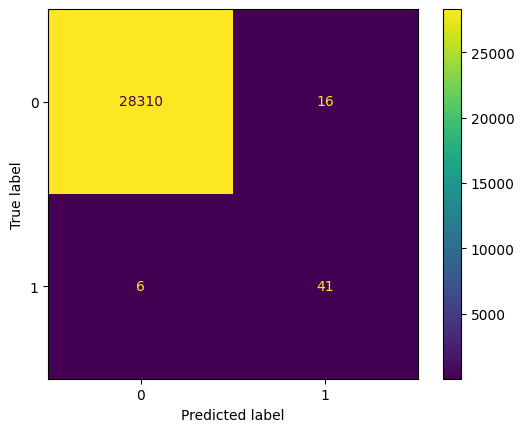

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test)

plt.show()
y_pred = clf_xgb.predict(X_test)

In [ ]:
Y_pred_proba_train = clf_xgb.predict_proba(X_train)
roc_auc_score_Train = roc_auc_score(y_train, Y_pred_proba_train[:,1])
print('Train set roc-auc:', roc_auc_score_Train)

Y_pred_proba_test = clf_xgb.predict_proba(X_test)
roc_auc_score_Test = roc_auc_score(y_test, Y_pred_proba_test[:,1])
print('Test set roc_auc:', roc_auc_score_Test)

Train set roc-auc: 0.9999309431323716
Test set roc_auc: 0.9876821685512596


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


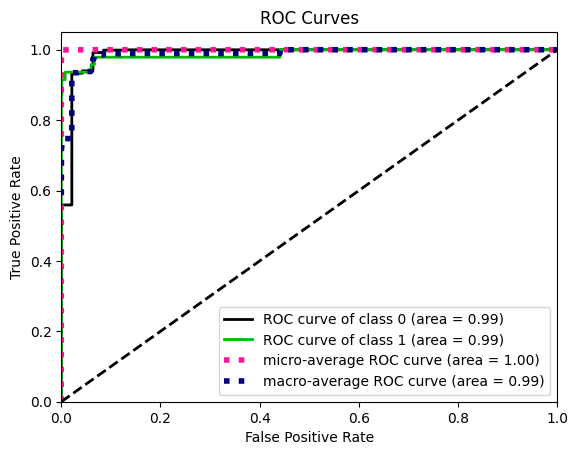

In [ ]:
skplt.metrics.plot_roc_curve(y_test,  Y_pred_proba_test)
plt.show()

In [ ]:
Y_test_xgb = clf_xgb.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, Y_test_xgb)

auc_pr = auc(recall, precision)
print('Area under PR Curve', auc_pr)

Area under PR Curve 0.8862215946331228


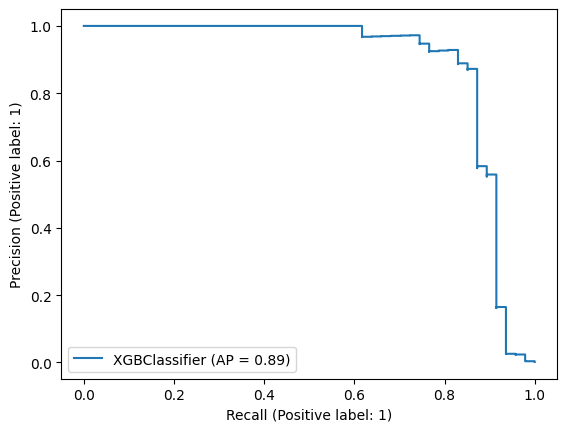

In [ ]:
display = PrecisionRecallDisplay.from_estimator(clf_xgb, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.72      0.87      0.79        47

    accuracy                           1.00     28373
   macro avg       0.86      0.94      0.89     28373
weighted avg       1.00      1.00      1.00     28373



# **RandomForest**

---



In [ ]:
clf_rfc = RFC(criterion = 'gini', max_depth = 8, min_samples_split = 10, random_state =42, class_weight='balanced')
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=10, random_state=42)

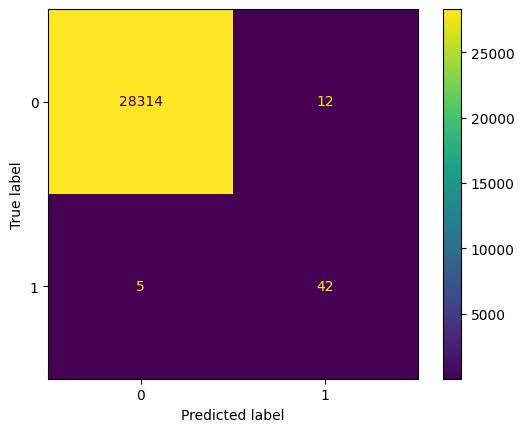

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_rfc, X_test, y_test)

plt.show()

In [ ]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [None, 8, 10],
    'min_samples_split' : [2, 5, 10, 12],
    'min_samples_leaf' : [1, 2, 5],
}
#
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(class_weight='balanced',seed = 42),
    param_grid=param_grid,
    verbose=0,
    n_jobs=10,
    cv=3
)
optimal_params.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc',  eval_set=[(X_test,y_test)], verbose=False)
print(optimal_params.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:42:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
clf_rfc = RFC(criterion = 'gini', max_depth = 8, min_samples_split = 2, min_samples_leaf =1, random_state =42, class_weight='balanced')
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42)

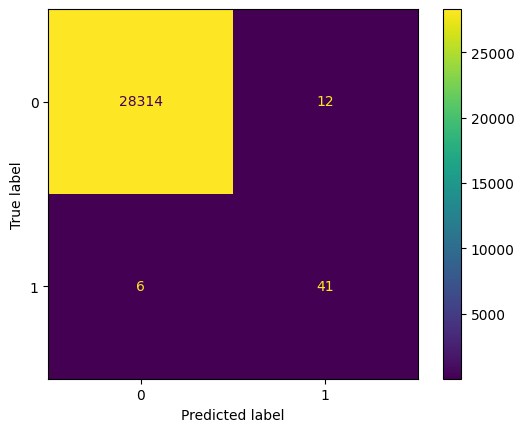

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_rfc, X_test, y_test)

plt.show()

In [ ]:
y_pred = clf_rfc.predict(X_test)
Y_pred_proba_train = clf_rfc.predict_proba(X_train)
roc_auc_score_Train = roc_auc_score(y_train, Y_pred_proba_train[:,1])
print('Train set roc-auc:', roc_auc_score_Train)

Y_pred_proba_test = clf_rfc.predict_proba(X_test)
roc_auc_score_Test = roc_auc_score(y_test, Y_pred_proba_test[:,1])
print('Test set roc_auc:', roc_auc_score_Test)

Train set roc-auc: 0.999843396206713
Test set roc_auc: 0.9830236411626939


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


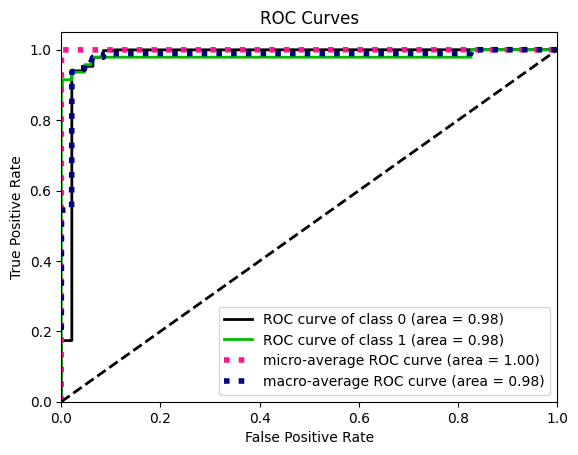

In [ ]:
skplt.metrics.plot_roc_curve(y_test,  Y_pred_proba_test)
plt.show()

In [ ]:
Y_test_rfc = clf_rfc.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, Y_test_rfc)

auc_pr = auc(recall, precision)
print('Area under PR Curve', auc_pr)

Area under PR Curve 0.8188010933691278


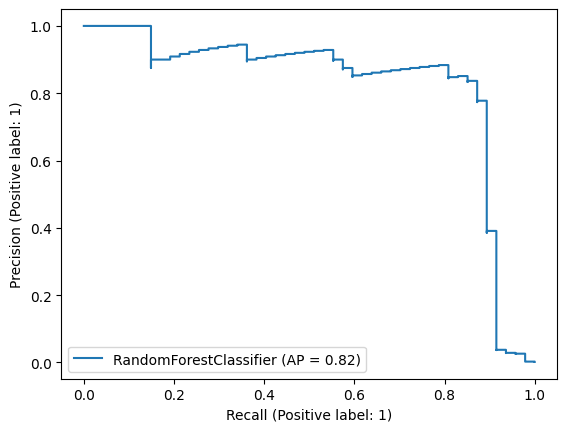

In [ ]:
display = PrecisionRecallDisplay.from_estimator(clf_rfc, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.78      0.89      0.83        47

    accuracy                           1.00     28373
   macro avg       0.89      0.95      0.92     28373
weighted avg       1.00      1.00      1.00     28373



In [8]:
np.bincount(y_train)

array([254927,    426])

# **SMOTE**

---



# **XGBoost**

---



In [ ]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 254927, 1: 254927})


In [ ]:
clf_xgb1 = xgb.XGBClassifier(objective = 'binary:logistic', missimg=None, seed=42, eval_metric='auc')
clf_xgb1.fit(x_smote,y_smote, verbose = True, early_stopping_rounds=10, eval_set=[(X_test,y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.96680
[1]	validation_0-auc:0.97114
[2]	validation_0-auc:0.93913
[3]	validation_0-auc:0.95857
[4]	validation_0-auc:0.95716
[5]	validation_0-auc:0.97134
[6]	validation_0-auc:0.97047
[7]	validation_0-auc:0.97129
[8]	validation_0-auc:0.97468
[9]	validation_0-auc:0.97640
[10]	validation_0-auc:0.97731
[11]	validation_0-auc:0.97816
[12]	validation_0-auc:0.97878
[13]	validation_0-auc:0.97698
[14]	validation_0-auc:0.97780
[15]	validation_0-auc:0.98118
[16]	validation_0-auc:0.98386
[17]	validation_0-auc:0.98350
[18]	validation_0-auc:0.98207
[19]	validation_0-auc:0.98252
[20]	validation_0-auc:0.98463
[21]	validation_0-auc:0.98542
[22]	validation_0-auc:0.98690
[23]	validation_0-auc:0.98506
[24]	validation_0-auc:0.98385
[25]	validation_0-auc:0.98346
[26]	validation_0-auc:0.98236
[27]	validation_0-auc:0.98343
[28]	validation_0-auc:0.98476
[29]	validation_0-auc:0.98376
[30]	validation_0-auc:0.98578
[31]	validation_0-auc:0.98478
[32]	validation_0-auc:0.98637


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missimg=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

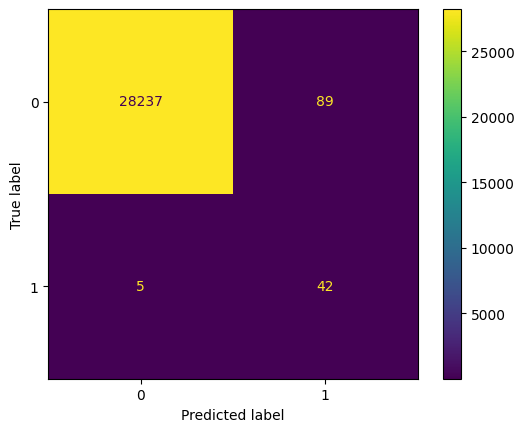

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_xgb1, X_test, y_test)

plt.show()

In [ ]:
y_pred = clf_xgb1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.32      0.89      0.47        47

    accuracy                           1.00     28373
   macro avg       0.66      0.95      0.74     28373
weighted avg       1.00      1.00      1.00     28373



In [ ]:
param_grids = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0.01,0.05, 0.1],
    'gamma' : [0, 0.25],
    'reg_lambda' : [0, 1, 10],
}
# gama 0.25, lr 0.1, mxd 5, lambda 10
param_grid = {
    'max_depth' : [5],
    'learning_rate' : [0.1,0.5],
    'gamma' : [0.25, 1],
    'reg_lambda' : [10],
    'subsample' : [0.5, 0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]
}
# colsample_bytree 1, gamma 0.25, learning_rate 0.1, max_depth 5, reg_lambda 10, scale_pos_weight 100, subsample 0.5
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective = 'binary:logistic', seed = 42),
    param_grid=param_grid,
    scoring = 'roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)
optimal_params.fit(x_smote, y_smote, early_stopping_rounds=10, eval_metric='auc',  eval_set=[(X_test,y_test)], verbose=False)
print(optimal_params.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'colsample_bytree': 1, 'gamma': 0.25, 'learning_rate': 0.5, 'max_depth': 5, 'reg_lambda': 10, 'subsample': 0.5}


In [ ]:
clf_xgb2 = xgb.XGBClassifier( seed =42, objective = 'binary:logistic', gamma = 0.25, learn_rate = 0.1, max_depth = 5, reg_lambda=10, subsample = 0.5, colsample_bytree = 1, eval_metric='auc')
clf_xgb2.fit(x_smote,y_smote, verbose = True, early_stopping_rounds=10, eval_set=[(X_test,y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:09:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-auc:0.95878
[1]	validation_0-auc:0.96598
[2]	validation_0-auc:0.96610
[3]	validation_0-auc:0.96932
[4]	validation_0-auc:0.96682
[5]	validation_0-auc:0.96616
[6]	validation_0-auc:0.97523
[7]	validation_0-auc:0.97904
[8]	validation_0-auc:0.97900
[9]	validation_0-auc:0.97695
[10]	validation_0-auc:0.97728
[11]	validation_0-auc:0.97929
[12]	validation_0-auc:0.97938
[13]	validation_0-auc:0.97768
[14]	validation_0-auc:0.97719
[15]	validation_0-auc:0.97948
[16]	validation_0-auc:0.97916
[17]	validation_0-auc:0.98094
[18]	validation_0-auc:0.97805
[19]	validation_0-auc:0.97522
[20]	validation_0-auc:0.97562
[21]	validation_0-auc:0.97954
[22]	validation_0-auc:0.97765
[23]	validation_0-auc:0.97948
[24]	validation_0-auc:0.97890
[25]	validation_0-auc:0.97815
[26]	validation_0-auc:0.97720
[27]	validation_0-auc:0.97887


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.25,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

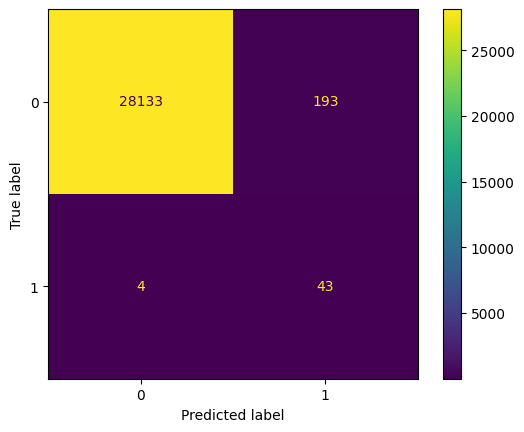

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_xgb2, X_test, y_test)

plt.show()
y_pred = clf_xgb1.predict(X_test)

In [ ]:
Y_pred_proba_train = clf_xgb1.predict_proba(x_smote)
roc_auc_score_Train = roc_auc_score(y_smote, Y_pred_proba_train[:,1])
print('Train set roc-auc:', roc_auc_score_Train)

Y_pred_proba_test = clf_xgb1.predict_proba(X_test)
roc_auc_score_Test = roc_auc_score(y_test, Y_pred_proba_test[:,1])
print('Test set roc_auc:', roc_auc_score_Test)

Train set roc-auc: 0.9999409518793254
Test set roc_auc: 0.9869047458090531


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


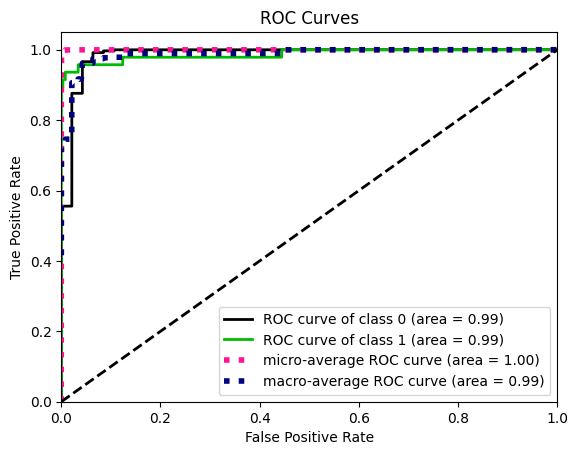

In [ ]:
skplt.metrics.plot_roc_curve(y_test,  Y_pred_proba_test)
plt.show()

In [ ]:
Y_test_xgb = clf_xgb1.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, Y_test_xgb)

auc_pr = auc(recall, precision)
print('Area under PR Curve', auc_pr)

Area under PR Curve 0.8708736649333995


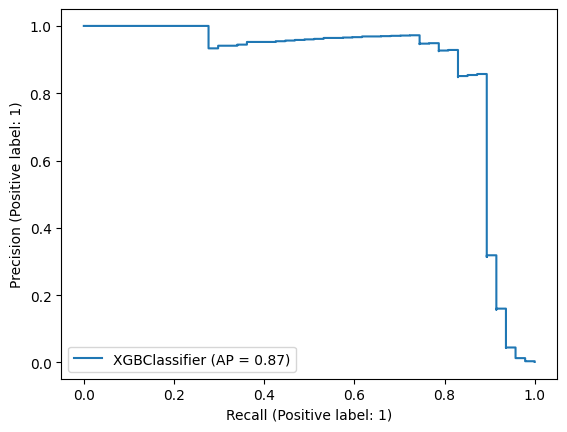

In [ ]:
display = PrecisionRecallDisplay.from_estimator(clf_xgb1, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.32      0.89      0.47        47

    accuracy                           1.00     28373
   macro avg       0.66      0.95      0.74     28373
weighted avg       1.00      1.00      1.00     28373



# **Random forest**

---



In [ ]:
clf_rfc1 = RFC(criterion = 'gini', max_depth = 8, min_samples_split = 10, random_state =42)
clf_rfc1.fit(x_smote, y_smote)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

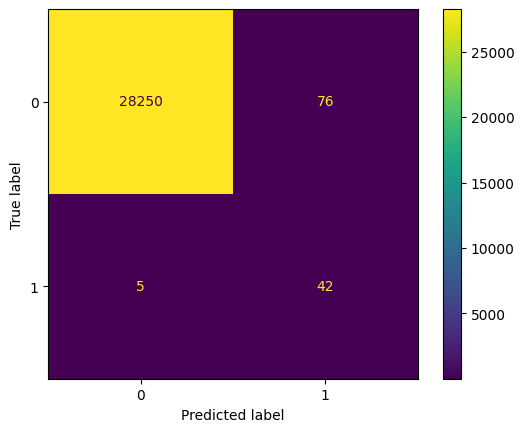

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_rfc1, X_test, y_test)

plt.show()

In [ ]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [None, 8, 10],
    'min_samples_split' : [2, 5, 10, 12],
    'min_samples_leaf' : [1, 2, 5],
}
#
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(class_weight='balanced',seed = 42),
    param_grid=param_grid,
    verbose=0,
    n_jobs=10,
    cv=3
)
optimal_params.fit(x_smote, y_smote, early_stopping_rounds=10, eval_metric='auc',  eval_set=[(X_test,y_test)], verbose=False)
print(optimal_params.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:51:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
clf_rfc1 = RFC(criterion = 'gini', max_depth = 10, min_samples_split = 2, random_state =42, min_samples_leaf = 1)
clf_rfc1.fit(x_smote, y_smote)

RandomForestClassifier(max_depth=10, random_state=42)

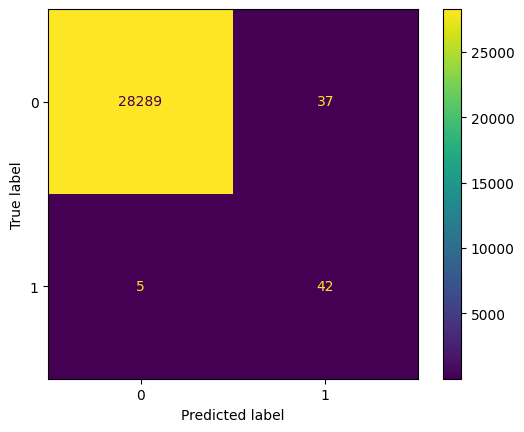

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_rfc1, X_test, y_test)

plt.show()

In [ ]:
y_pred = clf_rfc1.predict(X_test)
Y_pred_proba_train = clf_rfc1.predict_proba(x_smote)
roc_auc_score_Train = roc_auc_score(y_smote, Y_pred_proba_train[:,1])
print('Train set roc-auc:', roc_auc_score_Train)

Y_pred_proba_test = clf_rfc1.predict_proba(X_test)
roc_auc_score_Test = roc_auc_score(y_test, Y_pred_proba_test[:,1])
print('Test set roc_auc:', roc_auc_score_Test)

Train set roc-auc: 0.9998564783999332
Test set roc_auc: 0.9810203692269789


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


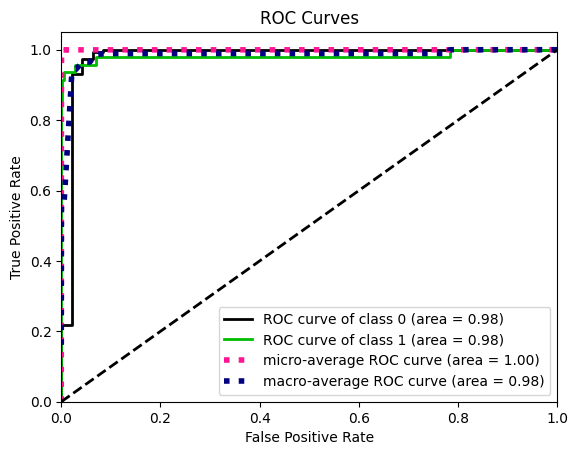

In [ ]:
skplt.metrics.plot_roc_curve(y_test,  Y_pred_proba_test)
plt.show()

In [ ]:
Y_test_rfc = clf_rfc1.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, Y_test_rfc)

auc_pr = auc(recall, precision)
print('Area under PR Curve', auc_pr)

Area under PR Curve 0.8222315661064484


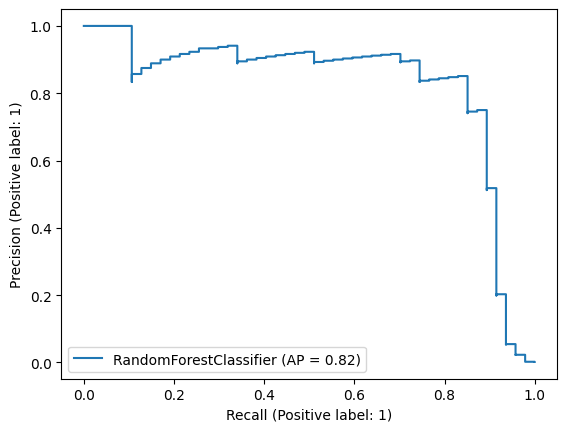

In [ ]:
display = PrecisionRecallDisplay.from_estimator(clf_rfc1, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.53      0.89      0.67        47

    accuracy                           1.00     28373
   macro avg       0.77      0.95      0.83     28373
weighted avg       1.00      1.00      1.00     28373

